In [1]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download tarunpaparaju/apple-aapl-historical-stock-data

In [2]:
# ! unzip apple-aapl-historical-stock-data.zip

In [3]:
import pandas as pd
df = pd.read_csv('/content/HistoricalQuotes.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [5]:
df['Close'] = df[' Close/Last'].apply(lambda x: float(x[2:]))	
df.head()

,Date,Close/Last,Volume,Open,High,Low,Close
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37,273.36
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96,273.52
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5,292.65
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13,288.08
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23,298.18


In [6]:
df[' Close/Last'][0]

' $273.36'

In [7]:
df.reset_index(inplace=True)

In [8]:
df.head()

,index,Date,Close/Last,Volume,Open,High,Low,Close
0,0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37,273.36
1,1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96,273.52
2,2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5,292.65
3,3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13,288.08
4,4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23,298.18


In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
df['Close'] = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))

In [10]:
train_ratio = 0.65
train_size = int(train_ratio*df.shape[0])
test_size = df.shape[0] - train_size
train = df['Close'][0:train_size]
test = df['Close'][train_size:df.shape[0]]

In [11]:
train.shape , test.shape , train_size , test_size

((1636,), (882,), 1636, 882)

In [12]:
train[0:3]

0    0.818943
1    0.819481
2    0.883813
Name: Close, dtype: float64

In [13]:
test[0:3]

1636    0.135498
1637    0.134390
1638    0.141298
Name: Close, dtype: float64

In [14]:
test = test.reset_index()
test = test['Close']
test

0      0.135498
1      0.134390
2      0.141298
3      0.140362
4      0.141294
         ...   
877    0.004852
878    0.000894
879    0.000231
880    0.000000
881    0.000067
Name: Close, Length: 882, dtype: float64

In [15]:
import numpy as np
def create_dataset(data,Timestamp=1):
  x = []
  y = []
  for i in range(len(data)-Timestamp-1):
    x.append(data[i:i+Timestamp])
    y.append(data[i+Timestamp])
  return np.array(x),np.array(y)

In [16]:
X_train , y_train = create_dataset(train,100)
X_test , y_test = create_dataset(test,100)

In [17]:
X_train.shape , y_train.shape , X_test.shape ,y_test.shape

((1535, 100), (1535,), (781, 100), (781,))

In [18]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler(feature_range=(0,1))
# scaler.fit_transform(np.array(df['Close']).reshape(-1,1))
# X_train , y_train , X_test ,y_test = scaler.fit_transform(np.array(X_train)) , np.array(y_train).reshape(-1,1),\
#   scaler.fit_transform(np.array(X_test)) , scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [19]:
X_train[0:3]

array([[0.81894262, 0.81948068, 0.88381255, 0.86844419, 0.90240927,
        0.95241527, 0.97679614, 0.9879609 , 0.9724244 , 0.99243352,
        0.99216449, 1.        , 0.97447575, 0.98099974, 0.97588816,
        0.99330787, 0.98066345, 0.97191996, 0.93765223, 0.94051068,
        0.98880161, 0.99038217, 0.96801903, 0.93862747, 0.97010401,
        0.97319786, 0.96805265, 0.9642526 , 0.97151642, 0.95977997,
        0.94666475, 0.951171  , 0.96556412, 0.94326824, 0.94091423,
        0.91925729, 0.90311547, 0.90785713, 0.89988711, 0.90970671,
        0.88717543, 0.8800125 , 0.87422835, 0.87459826, 0.85563163,
        0.85472365, 0.83938892, 0.84133939, 0.84039779, 0.84265092,
        0.84080133, 0.82496218, 0.81255315, 0.81023277, 0.80253178,
        0.79728569, 0.810031  , 0.79277943, 0.77986598, 0.77216498,
        0.78800414, 0.79839544, 0.80037953, 0.78844132, 0.7954361 ,
        0.78000049, 0.78077395, 0.78474215, 0.79516707, 0.797891  ,
        0.79338475, 0.78289257, 0.78904663, 0.78

In [20]:
X_test[0:3]

array([[0.13549811, 0.13439038, 0.1412984 , 0.14036184, 0.14129369,
        0.14100549, 0.14038572, 0.1435902 , 0.14099103, 0.13886771,
        0.1391512 , 0.13486118, 0.1241911 , 0.11798894, 0.12114063,
        0.12304772, 0.12317753, 0.12519526, 0.12187542, 0.11905834,
        0.11706651, 0.11744618, 0.1147895 , 0.1115228 , 0.11032629,
        0.11129211, 0.10095361, 0.10447017, 0.10381677, 0.1070875 ,
        0.10639172, 0.10633657, 0.10501294, 0.10456635, 0.10493997,
        0.10178962, 0.10256779, 0.09906065, 0.10019932, 0.10182325,
        0.1007135 , 0.09626004, 0.09016348, 0.08884254, 0.09090331,
        0.09309423, 0.09305085, 0.09831611, 0.09991986, 0.1028802 ,
        0.10709322, 0.10720386, 0.10626696, 0.10910859, 0.10729499,
        0.10989416, 0.11051394, 0.11191693, 0.11030712, 0.11350186,
        0.11551958, 0.1161972 , 0.11572371, 0.11661016, 0.11342518,
        0.11173836, 0.11352102, 0.11207499, 0.11169767, 0.11088386,
        0.11245466, 0.10780918, 0.10844241, 0.10

In [21]:
y_train[0:3]

array([0.66307321, 0.64225699, 0.63600204])

In [22]:
X_train.shape

(1535, 100)

In [23]:
y_train.shape

(1535,)

In [24]:
X_train.reshape([1,1535,100])

array([[[0.81894262, 0.81948068, 0.88381255, ..., 0.66314046,
         0.65429609, 0.66324135],
        [0.81948068, 0.88381255, 0.86844419, ..., 0.65429609,
         0.66324135, 0.66307321],
        [0.88381255, 0.86844419, 0.90240927, ..., 0.66324135,
         0.66307321, 0.64225699],
        ...,
        [0.1429943 , 0.16413235, 0.16200432, ..., 0.14283591,
         0.13901669, 0.13759923],
        [0.16413235, 0.16200432, 0.16686132, ..., 0.13901669,
         0.13759923, 0.13924301],
        [0.16200432, 0.16686132, 0.16461761, ..., 0.13759923,
         0.13924301, 0.13438533]]])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
X_test = X_test.reshape([X_test.shape[0],X_test.shape[1],1])
X_train = X_train.reshape([X_train.shape[0],X_train.shape[1],1])
       

In [28]:
y_test = y_test.reshape([-1])
y_train = y_train.reshape([-1])

In [29]:
X_train.shape , X_test.shape ,y_train.shape,y_test.shape

((1535, 100, 1), (781, 100, 1), (1535,), (781,))

In [30]:
X_train,X_test,y_train,y_test = np.array(X_train),np.array(X_test),\
    np.array(y_train),np.array(y_test)

In [31]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 6s 62ms/step - loss: 0.0196 - val_loss: 0.0121
Epoch 2/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 3/100
24/24 [==============================] - 0s 17ms/step - loss: 5.2024e-04 - val_loss: 1.9706e-04
Epoch 4/100
24/24 [==============================] - 0s 16ms/step - loss: 4.9517e-04 - val_loss: 2.5739e-04
Epoch 5/100
24/24 [==============================] - 0s 16ms/step - loss: 4.6007e-04 - val_loss: 2.6409e-04
Epoch 6/100
24/24 [==============================] - 0s 17ms/step - loss: 4.5015e-04 - val_loss: 2.0406e-04
Epoch 7/100
24/24 [==============================] - 0s 16ms/step - loss: 4.3191e-04 - val_loss: 2.0315e-04
Epoch 8/100
24/24 [==============================] - 0s 16ms/step - loss: 4.1021e-04 - val_loss: 2.2575e-04
Epoch 9/100
24/24 [==============================] - 0s 16ms/step - loss: 4.1575e-04 - val_loss: 1.5176e-04
Epoch 10/100
24/24 [========================

In [32]:
X_train.max()

0.9999999999999999

In [33]:
X_train.min()

0.11590866825641143

In [34]:
X_test.max()

0.2369628768483641

In [35]:
X_test.min()

0.00023069346253064282

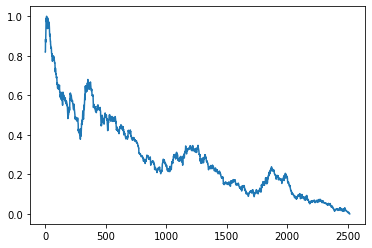

In [36]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [37]:
X_test

array([[[0.13549811],
        [0.13439038],
        [0.1412984 ],
        ...,
        [0.10832302],
        [0.10897643],
        [0.104792  ]],

       [[0.13439038],
        [0.1412984 ],
        [0.14036184],
        ...,
        [0.10897643],
        [0.104792  ],
        [0.10442208]],

       [[0.1412984 ],
        [0.14036184],
        [0.14129369],
        ...,
        [0.104792  ],
        [0.10442208],
        [0.10297605]],

       ...,

       [[0.02653311],
        [0.02422719],
        [0.0245443 ],
        ...,
        [0.00680747],
        [0.00491451],
        [0.0048523 ]],

       [[0.02422719],
        [0.0245443 ],
        [0.0241041 ],
        ...,
        [0.00491451],
        [0.0048523 ],
        [0.00089352]],

       [[0.0245443 ],
        [0.0241041 ],
        [0.02180591],
        ...,
        [0.0048523 ],
        [0.00089352],
        [0.00023069]]])

In [38]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

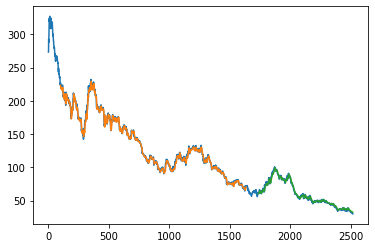

In [50]:
look_back=100
trainPredictPlot = np.empty_like(df['Close'])
trainPredictPlot = trainPredictPlot.reshape([-1,1])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df['Close'])
testPredictPlot = testPredictPlot.reshape([-1,1])
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df['Close'])-1, :] = test_predict

plt.plot(scaler.inverse_transform(np.array(df['Close']).reshape(-1,1)))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [53]:
X = df['Close'][len(df['Close'])-100:len(df['Close'])]

In [57]:
X = np.array(X)

In [62]:
for i in range(30):
  prediction = model.predict(X[i:100+i].reshape(1,100,1))
  prediction = prediction.reshape([-1])
  X = np.append(X,prediction)
X.shape

(131,)

In [63]:
X.shape

(131,)

In [64]:
X[-31:]

array([0.00642608, 0.00642608, 0.00592561, 0.00596168, 0.00634569,
       0.00689063, 0.00747766, 0.00805151, 0.00859621, 0.00911364,
       0.00961071, 0.0100937 , 0.01056682, 0.0110325 , 0.01149208,
       0.01194633, 0.01239579, 0.01284089, 0.01328197, 0.01371929,
       0.01415302, 0.01458327, 0.01501008, 0.01543346, 0.01585336,
       0.01626976, 0.01668259, 0.01709182, 0.0174974 , 0.0178993 ,
       0.01829751])

In [65]:
x1 = scaler.inverse_transform(np.array(df['Close']).reshape(-1,1))
x1.shape

(2518, 1)

In [69]:
x1 = x1.reshape([-1])
X_pred30 = scaler.inverse_transform(X.reshape(-1,1))
X_pred30 = X_pred30.reshape([-1])

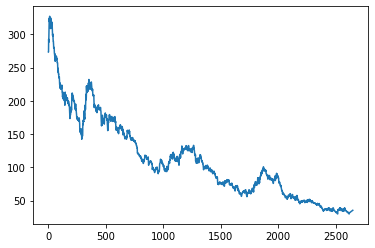

In [71]:
pred_30 = np.concatenate((x1, X_pred30), axis=0)
plt.plot(pred_30)